This tutorial guides you through some of the fundamental functions you may use while exploring the Indian Ocean zarr dataset.

This tutorial utilizes the [xarray](https://docs.xarray.dev/en/stable/) library. You can also use the [Zarr](https://zarr.readthedocs.io/en/stable/) library which is specialized in handling this type of dataset. Xarray is more well-known in the Python developer community, hence the preference. It also works seamlessly with other popular data libraries like Pandas, NumPy, and Dask.

## About our product

Our final product `INDIAN_OCEAN_025GRID_DAILY.zarr` is a blended dataset formated as a `.zarr` file, containing daily cleaned and interpolated data from fifteen variables across multiple sources, mostly from processed NASA/NOAA and Copernicus collections:

*Note dataset updated in 2024 with more CHL variables*

* `adt`: sea surface height above geoid (m)
* `air_temp`: air temperature (K)
* `CHL`: chlorophyll-a concentration (mg/m**3)
* `CHL_uncertainty`: chlorophyll-a concentration uncertainty (%)
* `mlotst`: mean ocean mixed layer thickness (m)
* `sla`: sea level anomaly (m)
* `so`: sea salinity concentration (m**-3 or PSL)
* `sst`: sea surface temperature (K)
* `topo`: topography (m)
* `u_curr`: u-component of total surface currents (m/s)
* `v_curr`: v-component of total surface currents (m/s)
* `ug_curr`: u-component of geostrophic surface currents (m/s)
* `vg_curr`: v-component of geostrophic surface currents (m/s)
* `u_wind`: u-component of surface wind (m/s)
* `v_wind`: v-component of surface wind (m/s)

We also computed four additional components, namely:
* `curr_speed`: total current speed (m/s)
* `curr_dir`: total current direction (degrees)
* `wind_speed`: surface wind speed (m/s)
* `wind_dir`: surface wind direction (degrees)

All variables have been broadcasted to all fit in the temporal range we have. Therefore, not all variable data are available at any time. Check out each individual variable before use.

## Load necessary libraries

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # simple plotting
import holoviews as hv # simple plotting
import hvplot.xarray # simple plotting
import cmocean

## Read data

In [2]:
ds = xr.open_zarr('/home/jovyan/shared/data/INDIAN_OCEAN_025GRID_DAILY.zarr/')

In [3]:
ds

<xarray.Dataset>
Dimensions:          (time: 16071, lat: 177, lon: 241)
Coordinates:
  * lat              (lat) float32 32.0 31.75 31.5 31.25 ... -11.5 -11.75 -12.0
  * lon              (lon) float32 42.0 42.25 42.5 42.75 ... 101.5 101.8 102.0
  * time             (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
Data variables: (12/19)
    CHL              (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    CHL_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    adt              (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    air_temp         (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    curr_dir         (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    curr_speed       (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    ...               ...
    ug_curr          (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    v_curr           (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    v_wind           (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    vg_curr          (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    wind_dir         (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    wind_speed       (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-19
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     Earth & Space Research (ESR), Copernicus Clim...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2022-12-31T23:59:59
    time_coverage_start:        1979-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

We can slice data by the dimensions (latitude, longitude, time) and data variables. 

In [4]:
# slice by latitude
# notice how we specify the range in reverse
ds.sel(lat=slice(0, -12))

<xarray.Dataset>
Dimensions:          (time: 16071, lat: 49, lon: 241)
Coordinates:
  * lat              (lat) float32 0.0 -0.25 -0.5 -0.75 ... -11.5 -11.75 -12.0
  * lon              (lon) float32 42.0 42.25 42.5 42.75 ... 101.5 101.8 102.0
  * time             (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
Data variables: (12/19)
    CHL              (time, lat, lon) float32 dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    CHL_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    adt              (time, lat, lon) float32 dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    air_temp         (time, lat, lon) float32 dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    curr_dir         (time, lat, lon) float32 dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    curr_speed       (time, lat, lon) float32 dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    ...               ...
    ug_curr          (time, lat, lon) float32 dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    v_curr           (time, lat, lon) float32 dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    v_wind           (time, lat, lon) float32 dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    vg_curr          (time, lat, lon) float32 dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    wind_dir         (time, lat, lon) float32 dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    wind_speed       (time, lat, lon) float32 dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-19
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     Earth & Space Research (ESR), Copernicus Clim...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2022-12-31T23:59:59
    time_coverage_start:        1979-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

In [5]:
# slice by longitude
ds.sel(lon=slice(42, 45))

<xarray.Dataset>
Dimensions:          (time: 16071, lat: 177, lon: 13)
Coordinates:
  * lat              (lat) float32 32.0 31.75 31.5 31.25 ... -11.5 -11.75 -12.0
  * lon              (lon) float32 42.0 42.25 42.5 42.75 ... 44.5 44.75 45.0
  * time             (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
Data variables: (12/19)
    CHL              (time, lat, lon) float32 dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    CHL_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    adt              (time, lat, lon) float32 dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    air_temp         (time, lat, lon) float32 dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    curr_dir         (time, lat, lon) float32 dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    curr_speed       (time, lat, lon) float32 dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    ...               ...
    ug_curr          (time, lat, lon) float32 dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    v_curr           (time, lat, lon) float32 dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    v_wind           (time, lat, lon) float32 dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    vg_curr          (time, lat, lon) float32 dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    wind_dir         (time, lat, lon) float32 dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    wind_speed       (time, lat, lon) float32 dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-19
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     Earth & Space Research (ESR), Copernicus Clim...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2022-12-31T23:59:59
    time_coverage_start:        1979-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

In [6]:
# slice by time
ds.sel(time=slice('1998', '1999'))

<xarray.Dataset>
Dimensions:          (time: 730, lat: 177, lon: 241)
Coordinates:
  * lat              (lat) float32 32.0 31.75 31.5 31.25 ... -11.5 -11.75 -12.0
  * lon              (lon) float32 42.0 42.25 42.5 42.75 ... 101.5 101.8 102.0
  * time             (time) datetime64[ns] 1998-01-01 1998-01-02 ... 1999-12-31
Data variables: (12/19)
    CHL              (time, lat, lon) float32 dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    CHL_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    adt              (time, lat, lon) float32 dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    air_temp         (time, lat, lon) float32 dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    curr_dir         (time, lat, lon) float32 dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    curr_speed       (time, lat, lon) float32 dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    ...               ...
    ug_curr          (time, lat, lon) float32 dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    v_curr           (time, lat, lon) float32 dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    v_wind           (time, lat, lon) float32 dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    vg_curr          (time, lat, lon) float32 dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    wind_dir         (time, lat, lon) float32 dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    wind_speed       (time, lat, lon) float32 dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-19
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     Earth & Space Research (ESR), Copernicus Clim...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2022-12-31T23:59:59
    time_coverage_start:        1979-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

In [7]:
# slice by variable
ds[['u_curr', 'u_wind']]

<xarray.Dataset>
Dimensions:  (time: 16071, lat: 177, lon: 241)
Coordinates:
  * lat      (lat) float32 32.0 31.75 31.5 31.25 ... -11.25 -11.5 -11.75 -12.0
  * lon      (lon) float32 42.0 42.25 42.5 42.75 ... 101.2 101.5 101.8 102.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
Data variables:
    u_curr   (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    u_wind   (time, lat, lon) float32 dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-19
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     Earth & Space Research (ESR), Copernicus Clim...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2022-12-31T23:59:59
    time_coverage_start:        1979-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

In [8]:
# combine multiple slicing options all at once
ds[['u_curr', 'u_wind']].sel(time=slice('1998', '1999'), 
                             lat=slice(0, -12), 
                             lon=slice(42, 45))

<xarray.Dataset>
Dimensions:  (time: 730, lat: 49, lon: 13)
Coordinates:
  * lat      (lat) float32 0.0 -0.25 -0.5 -0.75 ... -11.25 -11.5 -11.75 -12.0
  * lon      (lon) float32 42.0 42.25 42.5 42.75 43.0 ... 44.25 44.5 44.75 45.0
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 1999-12-31
Data variables:
    u_curr   (time, lat, lon) float32 dask.array<chunksize=(60, 49, 13), meta=np.ndarray>
    u_wind   (time, lat, lon) float32 dask.array<chunksize=(60, 49, 13), meta=np.ndarray>
Attributes: (12/17)
    creator_email:              minhphan@uw.edu
    creator_name:               Minh Phan
    creator_type:               person
    date_created:               2023-07-19
    geospatial_lat_max:         32.0
    geospatial_lat_min:         -12.0
    ...                         ...
    geospatial_lon_units:       degrees_east
    source:                     Earth & Space Research (ESR), Copernicus Clim...
    summary:                    Daily mean of 0.25 x 0.25 degrees gridded dat...
    time_coverage_end:          2022-12-31T23:59:59
    time_coverage_start:        1979-01-01T00:00:00
    title:                      Climate Data for Coastal Upwelling Machine Le...

We can also graph the data right from slicing, especially heatmaps from 2D arrays, or line charts. This is especially useful when we want to inspect elements on the go.

In [9]:
# make sure that the array you slice for a heatmap visualization is a 2D array
heatmap_arr = ds['wind_speed'].sel(time='2000-01-02')
heatmap_arr

<xarray.DataArray 'wind_speed' (lat: 177, lon: 241)>
dask.array<getitem, shape=(177, 241), dtype=float32, chunksize=(177, 241), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 32.0 31.75 31.5 31.25 ... -11.25 -11.5 -11.75 -12.0
  * lon      (lon) float32 42.0 42.25 42.5 42.75 ... 101.2 101.5 101.8 102.0
    time     datetime64[ns] 2000-01-02
Attributes:
    long_name:  10 metre absolute speed
    units:      m s**-1

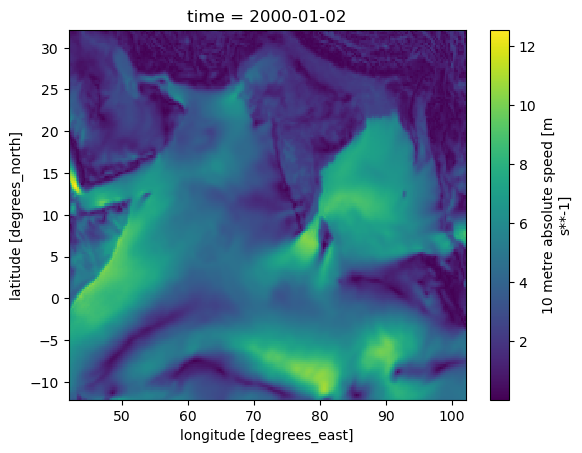

In [12]:
heatmap_arr.plot.imshow()

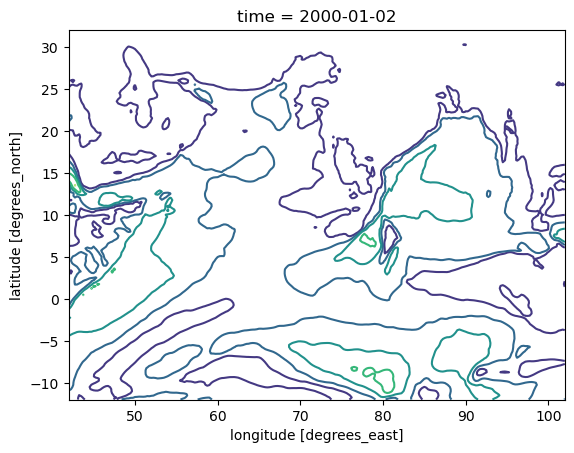

In [13]:
# contour map with no filling
heatmap_arr.plot.contour()

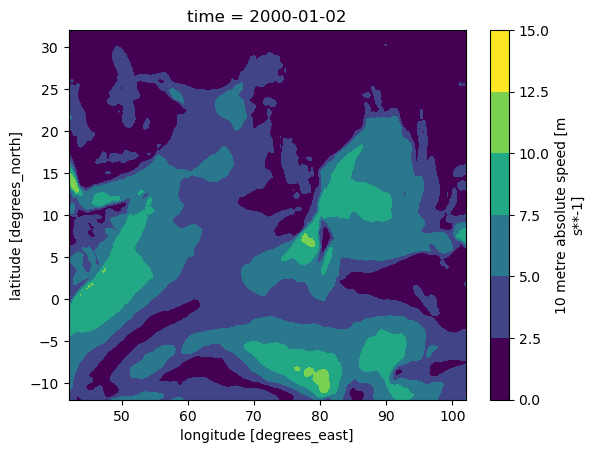

In [14]:
# contour map with color filling
heatmap_arr.plot.contourf()

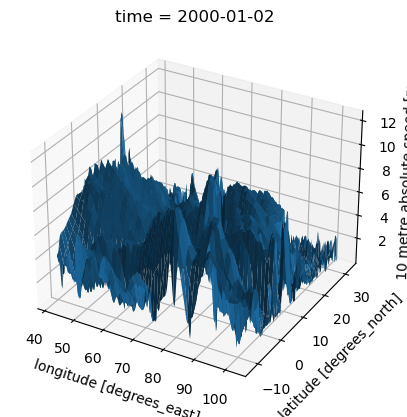

In [15]:
heatmap_arr.plot.surface()

#### Line plots

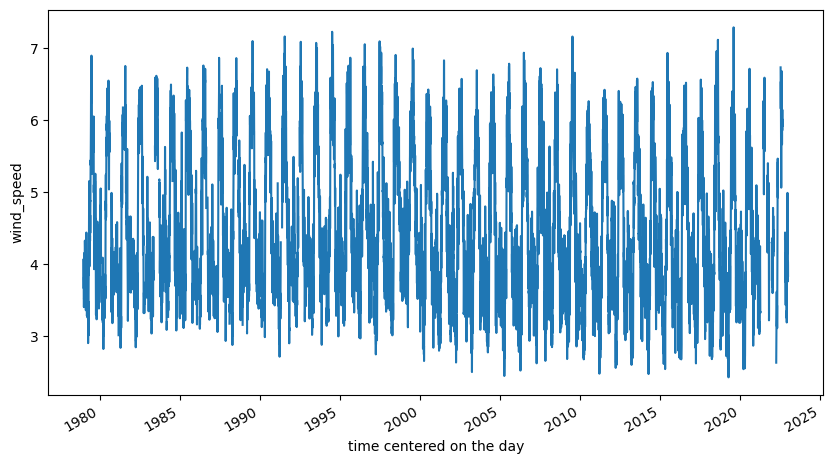

In [16]:
ds['wind_speed'].mean(dim=['lat', 'lon']).plot(figsize=(10, 5))

We can add in parameters to customize our graphs, as additional arguments are passed to the underlying matplotlib `plot()` function.

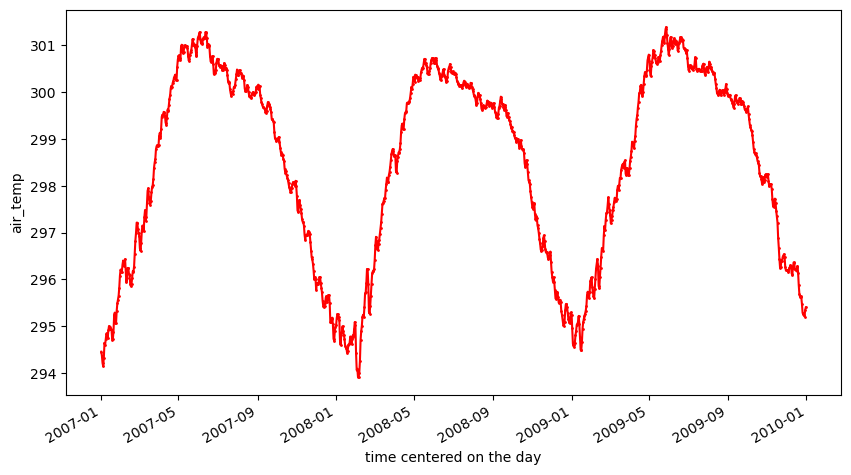

In [17]:
ds['air_temp'].mean(dim=['lat', 'lon']).sel(time=slice('2007', '2009')).plot.line('r-o', figsize=(10,5), markersize=1)

#### Histogram

Text(0.5, 1.0, 'Daily average wind direction distribution over covered area (1979-2022)')

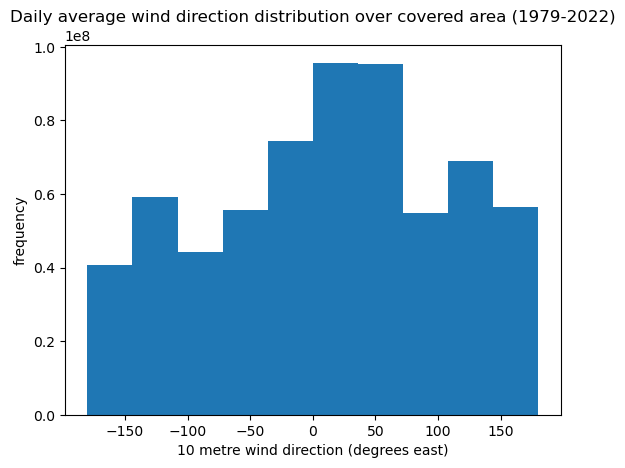

In [3]:
# creating a new Axe object if there is no currently
# available one
ax = plt.gca() 
ds['wind_dir'].plot.hist(ax = ax)
ax.set_xlabel('10 metre wind direction (degrees east)')
ax.set_ylabel('frequency')
ax.set_title('Daily average wind direction distribution over covered area (1979-2022)')

In [6]:
# scroll along the axes to stretch the graph
heatmap_arr.hvplot().options(cmap='bgy', width=600, height=500)

:Image   [lon,lat]   (wind_speed)

## Resampling

#### With xarray

If your xarray version works just fine with `resample()`, here's the most straightforward way to resample your data temporally. It may take a long while for the data to finish resampling, especially if your dataset is big and your resampling frequency is small.

In [13]:
ds_resampled = ds['CHL'].resample(time='1M').mean()

#### Without xarray

If not, which was the case we encountered for a bit during the documentation, we developed a roundabout using Pandas' equivalent function with the same name, which also happened to also be the underlying function that the library itself depends on (of course, more optimized), to help us perform resampling on our dataset.

In [8]:
# resampling is having issues, so this is a temporary solution using Pandas 
# to perform resampling by month on one range...

# choose a small range just in case overloadding happens...

ds_to_resample = ds['CHL'].sel(lat=slice(10, 5), lon=slice(75, 80)).to_dataframe()

In [9]:
df_resampled = ds_to_resample.groupby([pd.Grouper(freq='1M', level='time'),
                        pd.Grouper(level='lon'),
                        pd.Grouper(level='lat')]).mean()

In [10]:
ds_resampled = xr.Dataset.from_dataframe(df_resampled)

We can see that after resampling, our time dimension size is reduced from 8523 (days) to 280 (months). Resampling is successful!

In [11]:
# original ds_to_resample object before converting to dataframe
ds['CHL'].sel(lat=slice(10, 5), lon=slice(75, 80))

<xarray.DataArray 'CHL' (time: 16071, lat: 21, lon: 21)>
dask.array<getitem, shape=(16071, 21, 21), dtype=float32, chunksize=(100, 21, 21), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 10.0 9.75 9.5 9.25 9.0 8.75 ... 6.0 5.75 5.5 5.25 5.0
  * lon      (lon) float32 75.0 75.25 75.5 75.75 76.0 ... 79.25 79.5 79.75 80.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
Attributes:
    _ChunkSizes:                [1, 256, 256]
    ancillary_variables:        flags CHL_uncertainty
    coverage_content_type:      modelResult
    input_files_reprocessings:  Processors versions: MODIS R2022.0NRT/VIIRSN ...
    long_name:                  Chlorophyll-a concentration - Mean of the bin...
    standard_name:              mass_concentration_of_chlorophyll_a_in_sea_water
    type:                       surface
    units:                      milligram m-3
    valid_max:                  1000.0
    valid_min:                  0.0

In [12]:
ds_resampled

<xarray.Dataset>
Dimensions:  (time: 528, lon: 21, lat: 21)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-31 1979-02-28 ... 2022-12-31
  * lon      (lon) float32 75.0 75.25 75.5 75.75 76.0 ... 79.25 79.5 79.75 80.0
  * lat      (lat) float32 5.0 5.25 5.5 5.75 6.0 6.25 ... 9.0 9.25 9.5 9.75 10.0
Data variables:
    CHL      (time, lon, lat) float32 nan nan nan nan ... 3.221 2.768 nan 1.353

... and as a matter of fact, we can graph this data, too!

In [14]:
CHL_month = ds_resampled.mean(dim=['lat', 'lon']).hvplot(label='monthly resampling').options(color='red', )

In [15]:
CHL_day = ds['CHL'].sel(lat=slice(10, 5), lon=slice(75, 80)).mean(dim=['lat', 'lon']).hvplot(label='daily resampling').options(color='blue')

In [16]:
(CHL_day*CHL_month).options(title='Monthly vs Daily resampling of chlorophyll-a levels', xlabel='year')

:Overlay
   .Curve.Daily_resampling   :Curve   [time]   (CHL)
   .Curve.Monthly_resampling :Curve   [time]   (CHL)